<a href="https://colab.research.google.com/github/papu7896/projects/blob/main/Airbnb_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [64]:
df=pd.read_csv('/content/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [65]:
df.shape

(48895, 16)

In [66]:
df.duplicated().sum()

0

In [67]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [68]:
df.dropna(how='any',inplace=True)
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [69]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.882100e+04,3.882100e+04,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000
mean,1.810081e+07,6.424582e+07,40.728129,-73.951149,142.332526,5.869220,29.290255,1.373229,5.166611,114.886299
std,1.069372e+07,7.589752e+07,0.054991,0.046693,196.994756,17.389026,48.182900,1.680328,26.302954,129.529950
min,2.539000e+03,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,8.721444e+06,7.029525e+06,40.688640,-73.982460,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,1.887286e+07,2.837092e+07,40.721710,-73.954810,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,2.756746e+07,1.018905e+08,40.762990,-73.935020,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,3.645581e+07,2.738417e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [70]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [71]:
df.drop(['id','host_name','name','last_review'],axis=1,inplace=True)

In [72]:
df.head(2)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355


<ipython-input-73-5bbd3662a73c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr(method='kendall')


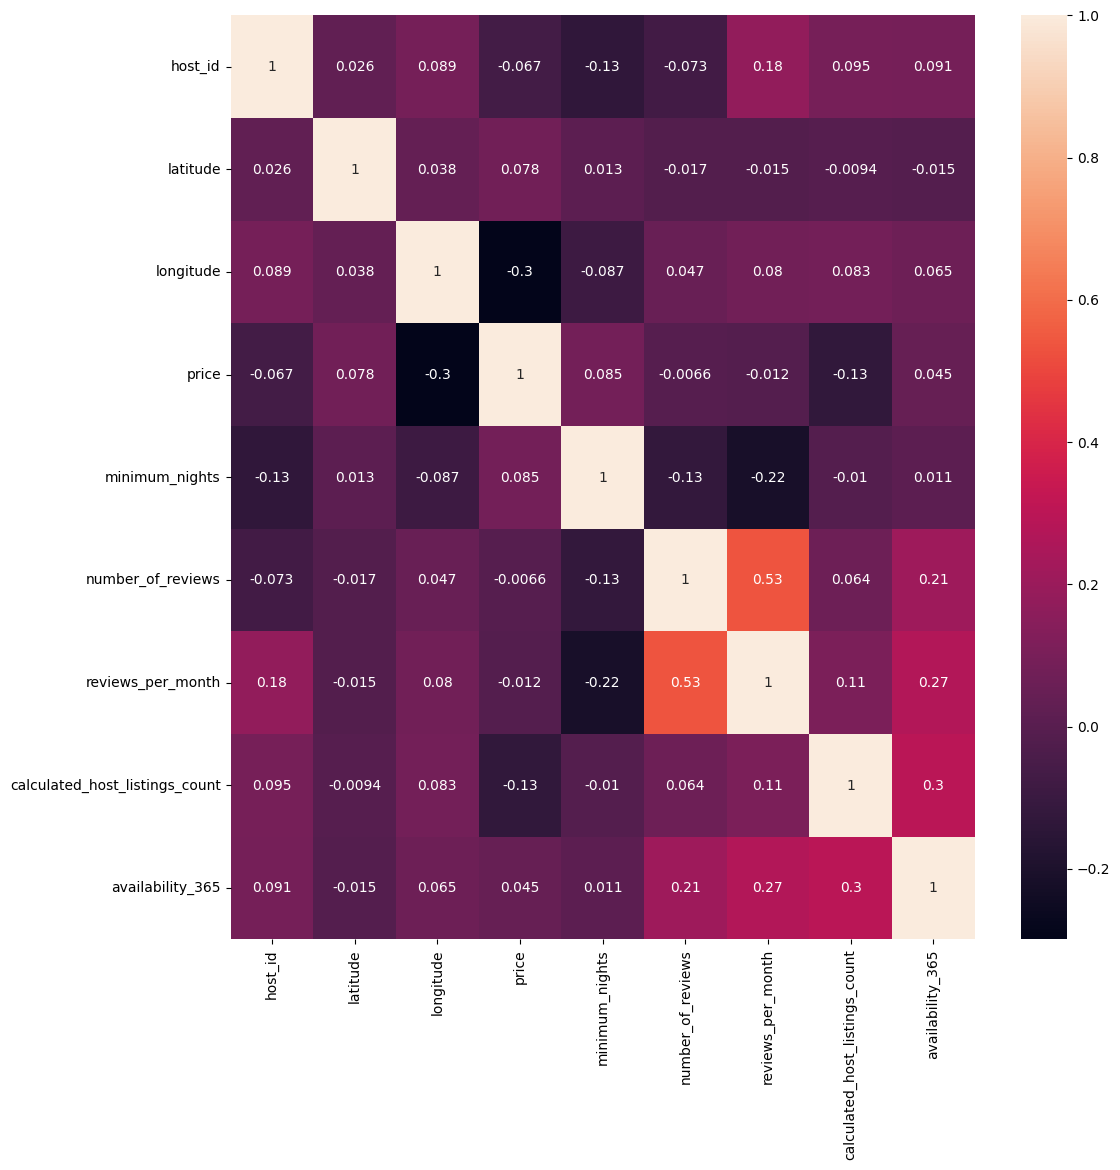

In [73]:
corr=df.corr(method='kendall')
plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True)
plt.show()

In [74]:
df['neighbourhood_group'].unique()


# Convert the 'neighbourhood_group' column to categorical data type
df['neighbourhood_group'] = df['neighbourhood_group'].astype('category')

# Plot the countplot


In [75]:
sns.countplot(data=df, x='neighbourhood_group', palette='plasma')
plt.title('neighbourhood_group')

Text(0.5, 1.0, 'neighbourhood_group')

In [76]:
sns.countplot(data=df,x='neighbourhood',palette="plasma")
fig=plt.gcf()
fig.set_size_inches(25,6)
plt.title('neighbourhood')

Text(0.5, 1.0, 'neighbourhood')

In [77]:
sns.countplot(data=df,x='room_type',palette="plasma")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.title('room_type')

Text(0.5, 1.0, 'room_type')

In [78]:
plt.figure(figsize=(12,10))
ax=sns.boxplot(data=df,x='neighbourhood_group',y='availability_365',palette='plasma')

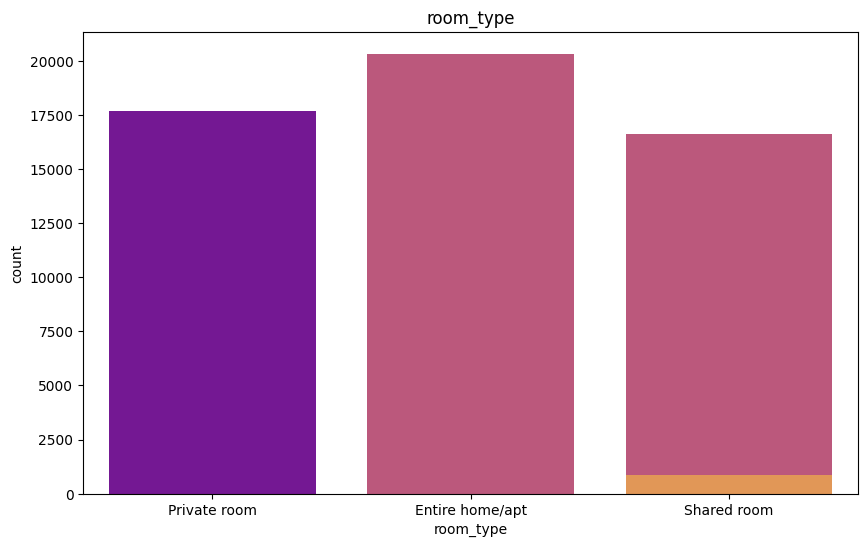

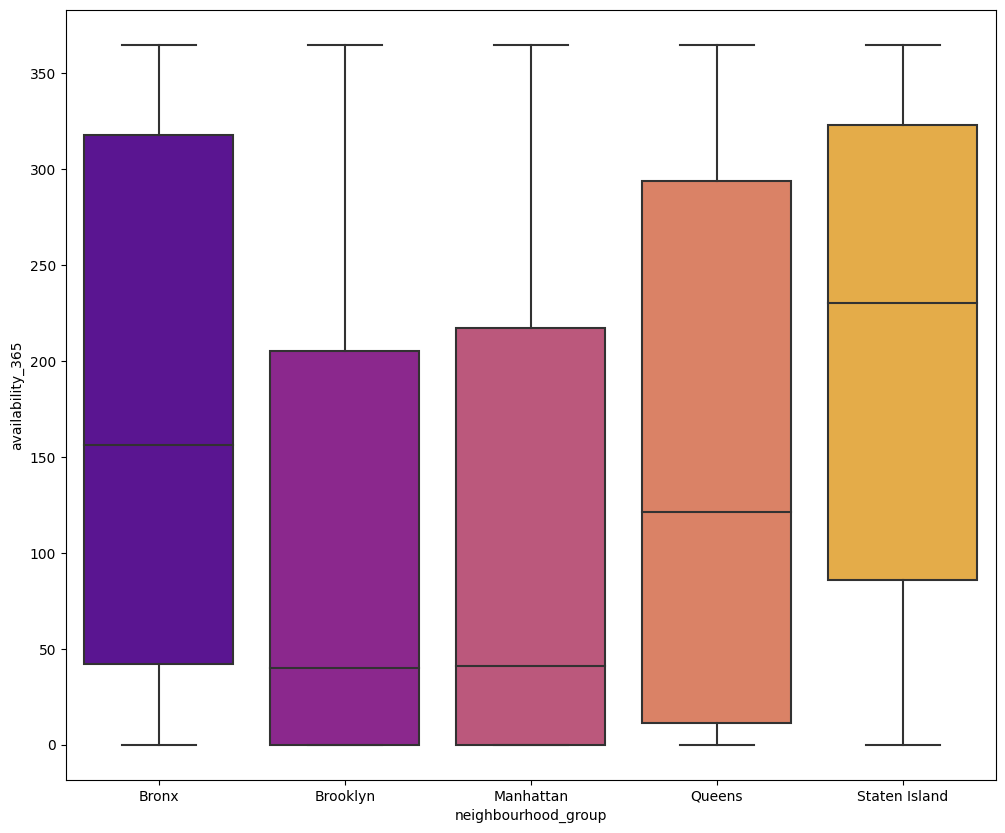

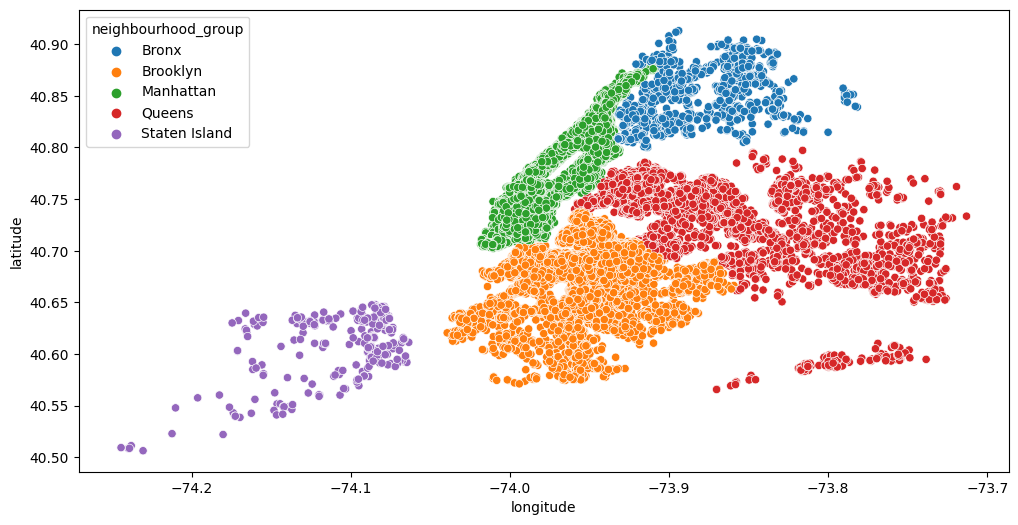

In [79]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df.longitude,y=df.latitude,hue=df.neighbourhood_group)
plt.ioff()
plt.show()

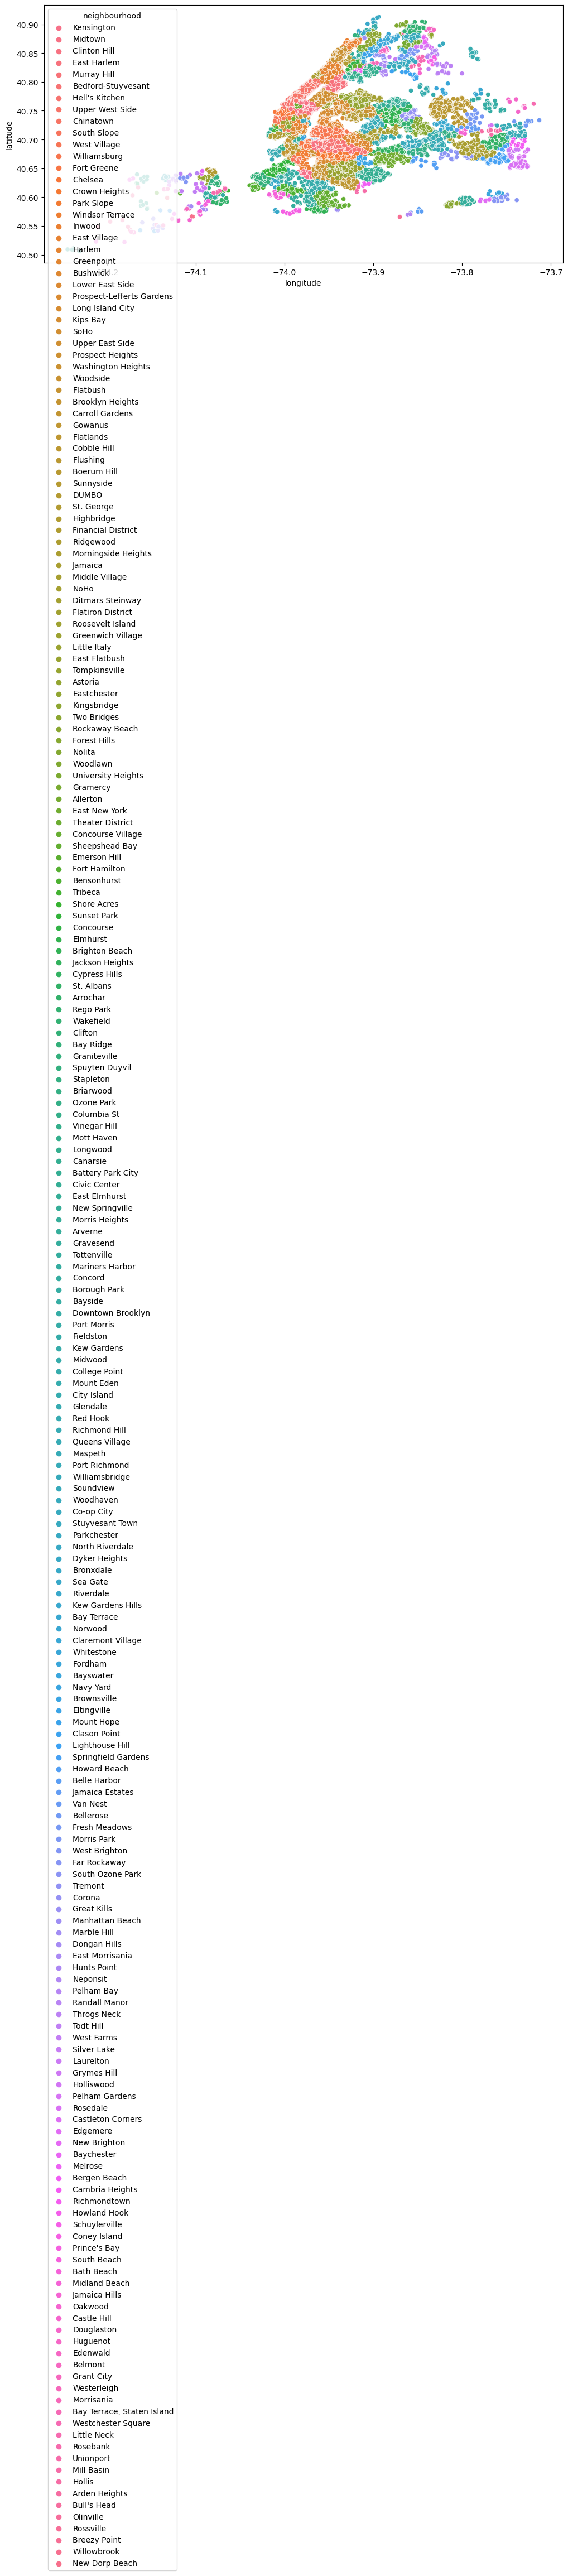

In [80]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df.longitude,y=df.latitude,hue=df.neighbourhood)
plt.ioff()
plt.show()

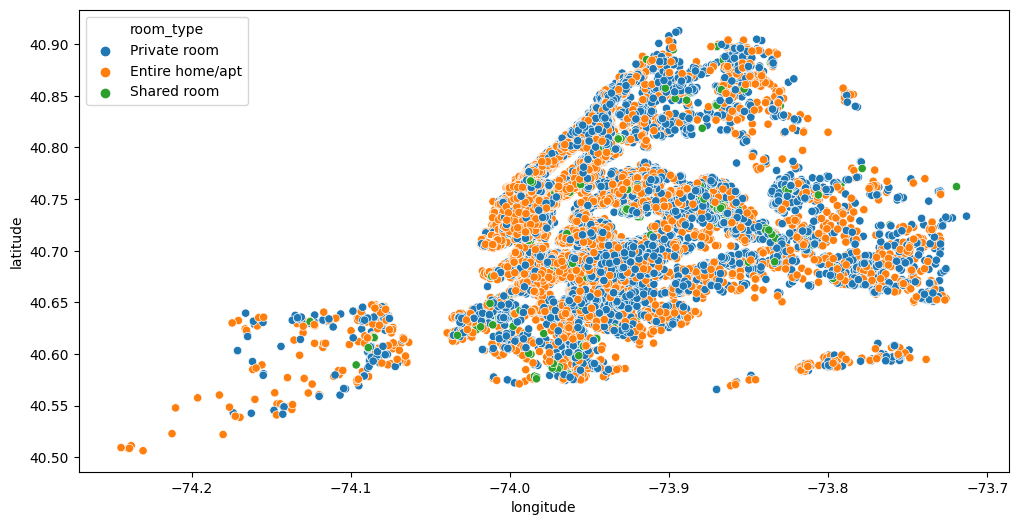

In [81]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df.longitude,y=df.latitude,hue=df.room_type)
plt.ioff()
plt.show()

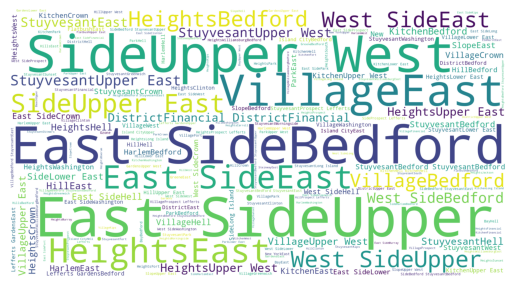

In [82]:

from wordcloud import WordCloud

wordcloud = WordCloud(
    background_color='white',
    width=2020,
    height=1090,
).generate(''.join(df.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()




In [83]:
#Airbnb Data Analysis :-

#Short Info about Airbnb -

#Airbnb is a platform that allows travelers to book unique accommodations around the world. Hosts can list their properties for rent, from apartments and houses to castles and treehouses. The platform offers a range of price points to fit different budgets and travel styles. Airbnb also provides a safe and secure way to book accommodations, with features like verified reviews and secure payments.

#-- I recently completed a data analysis project on Airbnb using Pandas, where I worked with a dataset of almost 49000 rows and 16 columns. After importing necessary libraries, I cleaned the data by removing duplicates and null values, and dropped two columns with maximum null values. I also filled in null values where necessary.

#-- Using various data visualization techniques such as heat maps, bar charts, count plots, box plots, and maps, I identified popular rental locations, compared neighborhood groups and availability across different neighborhoods and analyzed frequently used neighborhood in Airbnb listings.

#-- Overall, my analysis allowed me to identify key trends and patterns within the data set and gain a deeper understanding of the factors that influence the success of an Airbnb listing.